<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Svetlana's comment  </b>
    

Hi, it's Svetlana ([my TripleTen Hub Profile](https://hub.tripleten.com/u/6dee602c)).


Thank you for submitting such a great plan! It has everything you need, so you can move on to the code part! :) 

Answers to your questions: 



- Should churn include customers whose end date involved them leaving or should the positive class show customers that are still active?

1 indicates churn, as we are predicting where a person will leave, not stay. 


- Are we predicting for the next month or the entire remaining contract period?

This is not specified, so you do not need to take it into account.


- Would other metrics like precision or recall be important as far as performance metrics go?

Yes, they also may be useful.  However, we should not rely on them more than on the main metric. 


- Should the model that we are making include all customers or just the ones that are using both the internet and phone services?

Until we train and compare these two models, we cannot answer the question. This is called feature engineering. You are to decide which features to include. If you think you may get different results, consider training several models, each on a different set of features.


- If some of these customers have no phone or internet record, are we treating this as missing data or that they simply have no service?

We never know. I person may both not have a phone or not provide one. 


- Are there any other fields that should not be used for ethical reasons(personal data for instance)?

There's no sensitive data in the dataset.


- Are we running this model in real time or monthly?

This is also not specified. It is actualy not very important, as it will not influence your model in this case. </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
contract = pd.read_csv("/datasets/final_provider/contract.csv")
personal = pd.read_csv("/datasets/final_provider/personal.csv")
internet = pd.read_csv("/datasets/final_provider/internet.csv")
phone = pd.read_csv("/datasets/final_provider/phone.csv")

In [3]:
df = (contract.merge(personal, on='customerID', how='left')
              .merge(internet, on='customerID', how='left')
              .merge(phone, on='customerID', how='left', suffixes=('', '_phone')))


df['churn'] = np.where(df['EndDate'] == 'No', 0, 1)

print("Merged dataset shape:", df.shape)
print("Churn distribution:\n", df['churn'].value_counts(normalize=True))

Merged dataset shape: (7043, 21)
Churn distribution:
 0    0.73463
1    0.26537
Name: churn, dtype: float64


In [4]:
print("\nMissing Values (%):")
print(df.isnull().mean().sort_values(ascending=False).head(10))

print("\nData Types:")
print(df.dtypes.value_counts())

# Check duplicates
print("\nDuplicate customerIDs:", df['customerID'].duplicated().sum())


Missing Values (%):
StreamingMovies     0.216669
StreamingTV         0.216669
TechSupport         0.216669
DeviceProtection    0.216669
OnlineBackup        0.216669
OnlineSecurity      0.216669
InternetService     0.216669
MultipleLines       0.096834
customerID          0.000000
Dependents          0.000000
dtype: float64

Data Types:
object     18
int64       2
float64     1
dtype: int64

Duplicate customerIDs: 0


In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric Columns Summary:")
print(df[num_cols].describe().T)

print("\nCategorical Columns (first 10 unique values):")
for c in cat_cols[:10]:
    print(f"\n{c}:")
    print(df[c].value_counts().head())


Numeric Columns Summary:
                 count       mean        std    min   25%    50%    75%  \
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
churn           7043.0   0.265370   0.441561   0.00   0.0   0.00   1.00   

                   max  
MonthlyCharges  118.75  
SeniorCitizen     1.00  
churn             1.00  

Categorical Columns (first 10 unique values):

customerID:
1928-BXYIV    1
3284-SVCRO    1
8680-CGLTP    1
3841-NFECX    1
8590-OHDIW    1
Name: customerID, dtype: int64

BeginDate:
2014-02-01    366
2019-09-01    237
2019-11-01    237
2019-10-01    237
2020-01-01    233
Name: BeginDate, dtype: int64

EndDate:
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Type:
Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtyp

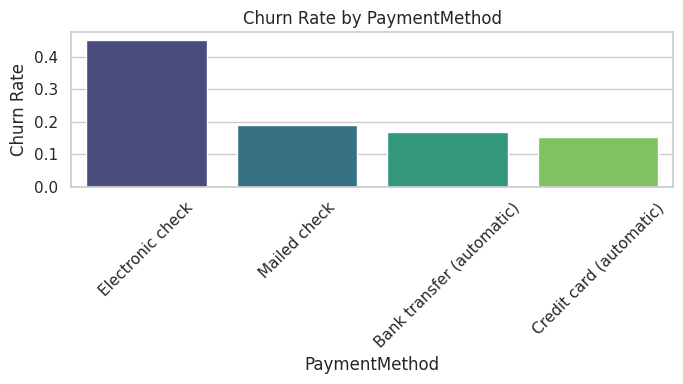

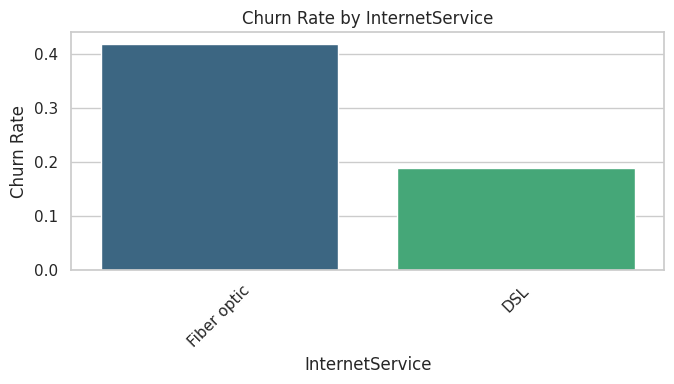

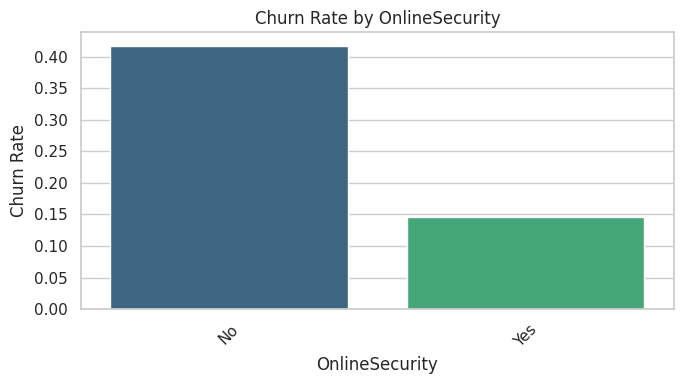

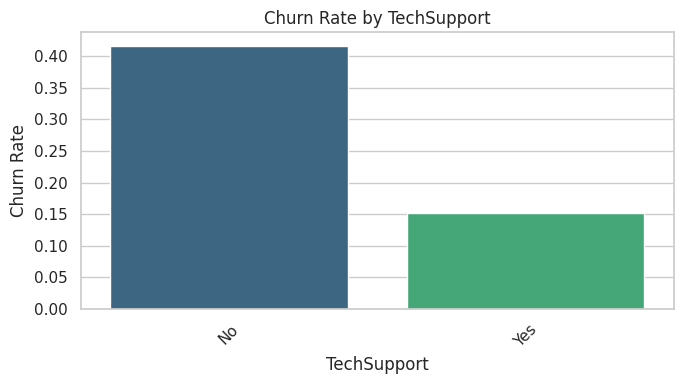

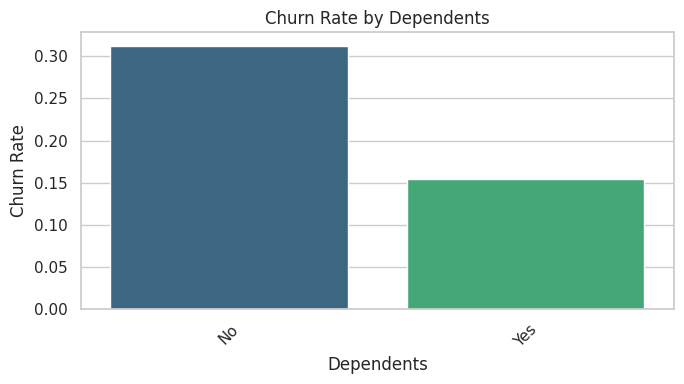

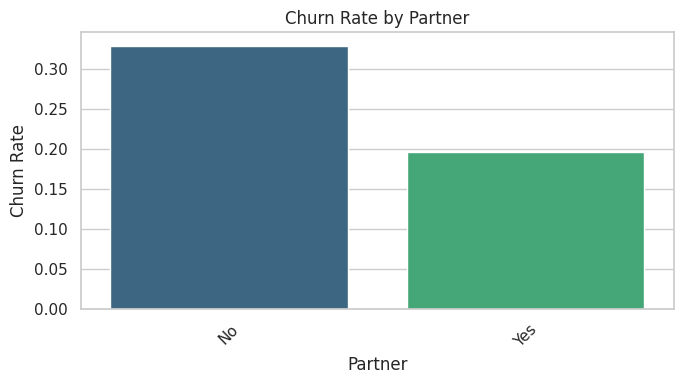

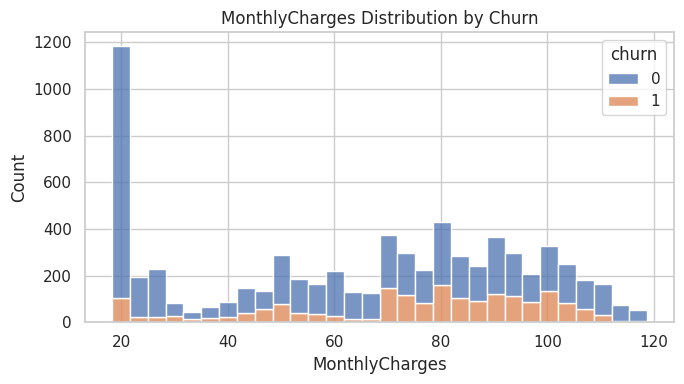

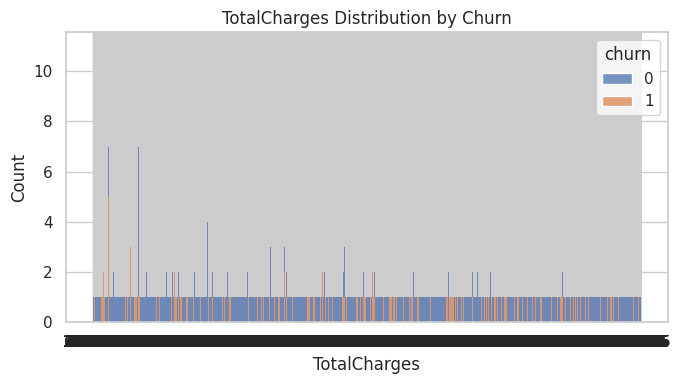

In [6]:
cat_features = ['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity',
                'TechSupport', 'Dependents', 'Partner']

for col in cat_features:
    if col in df.columns:
        churn_rates = df.groupby(col)['churn'].mean().sort_values(ascending=False)
        plt.figure(figsize=(7,4))
        sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='viridis')
        plt.xticks(rotation=45)
        plt.title(f'Churn Rate by {col}')
        plt.ylabel('Churn Rate')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

# Numerical distributions
num_features = ['MonthlyCharges', 'TotalCharges', 'tenure']  # Adjust if columns differ

for col in num_features:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.histplot(data=df, x=col, hue='churn', multiple='stack', bins=30)
        plt.title(f'{col} Distribution by Churn')
        plt.tight_layout()
        plt.show()

In [7]:
if 'tenure' in df.columns:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix (Numerical Features)")
    plt.tight_layout()
    plt.show()

Clarifying questions:

Should churn include customers whose end date involved them leaving or should the positive class show customers that are still active?

Are we predicting for the next month or the entire remaining contract period?

Would other metrics like precision or recall be important as far as performance metrics go?

Should the model that we are making include all customers or just the ones that are using both the internet and phone services?

If some of these customers have no phone or internet record, are we treating this as missing data or that they simply have no service?

Are there any other fields that should not be used for ethical reasons(personal data for instance)?

Are we running this model in real time or monthly?

Rough Plan for solving the task:

1. First, we need to join the data together and clean it.  We can merge all four datasets, clean missing values, and convert columns that strings to numeric. We need to be mindful of those with no internet or phone service, though.

2. We might need to run a deeper exploratory analysis and we also implement some feature engineering as well.  We can work to identify which features are correlated.

3. From there, we can set up a preprocessing pipeline that can help with missing values, scale the columns we converted and encode the variables we have.

4. Train baseline models and use AUC-ROC as the primary metric and have Accuracy as the secondary.

5. Analyze the most important features and provide insights with action steps that can be taken for targeted marketing strategies that can keep customers with the company.